In [2]:
import numpy as np
import pandas as pd
from datetime import datetime 
from datetime import timedelta
import csv 
import matplotlib.pyplot as plt
from datetime import date
from datetime import time
from sklearn.datasets import load_iris
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator)
import seaborn as sns
from matplotlib import pyplot
import collections
import dataset2020

C:\Users\hanaa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (33,36) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


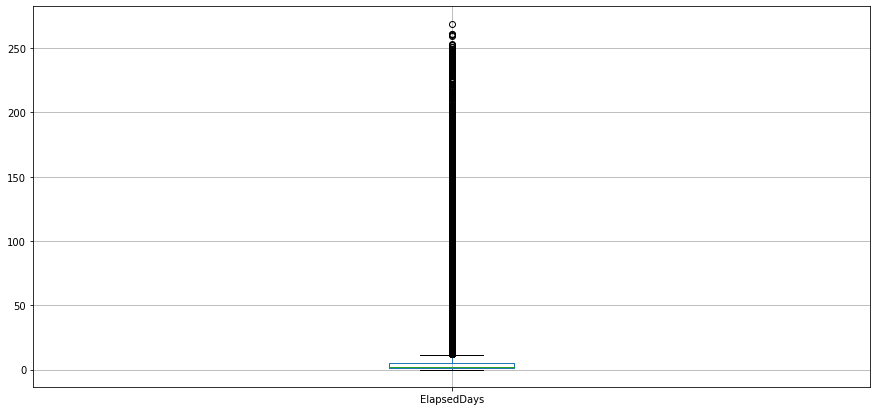

In [83]:
df = dataset2020.cleaned_df(r"C:\Users\hanaa\Downloads\cleaned_MyLA311_Service_Request_Data_2020.csv")
df = df[df.ElapsedDays >= 0]
boxplot = df.boxplot(column=['ElapsedDays'], figsize=(15,7))
#ax.set_xlabel('Elapsed Days')
#ax.set_ylabel('# of Requests')

In [69]:
"""#group requests by range of ranges of elapsed days
df1 = df[df.ElapsedDays <= 7]
df2 = df[(df.ElapsedDays > 7) & (df.ElapsedDays <= 30)]
df3 = df[(df.ElapsedDays > 30) & (df.ElapsedDays <= 90)]
df4 = df[(df.ElapsedDays > 90)]"""

In [33]:
# Accepts 311 dataset, groups requests that were closed within a week into categories of 0-7, 8-30, 31-90, 91+ days 
# returns a dictionary where the keys are the day ranges and the values are the lists of days
def days_analysis(filepath):   
    """Calculates elapsed day distributions"""
    df = dataset2020.cleaned_df(filepath)

    dict_ECT = dict()
    isWeek, isMonth, is3Months, isGreater = [],[],[],[]
    for days in df['ElapsedDays']:
        if (days >= 0) and (days <= 7):
            isWeek.append(days)
        elif (days > 7)  & (days <= 30):
            isMonth.append(days)
        elif (days > 30) & (days <= 90):
            is3Months.append(days)
        elif (days > 90):
            isGreater.append(days)
    
    
    dict_ECT['0-7'] = isWeek
    dict_ECT['8-30'] = isMonth
    dict_ECT['31-90'] = is3Months
    dict_ECT['91+'] = isGreater
    
    return dict_ECT

In [34]:
dict_2020 = days_analysis(r"C:\Users\hanaa\Downloads\cleaned_MyLA311_Service_Request_Data_2020.csv")

C:\Users\hanaa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (33,36) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


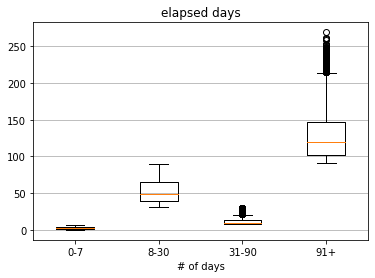

In [91]:
fig, ax = plt.subplots()

# build a box plot
ax.boxplot(list(dict_2020.values()))

# title and axis labels
ax.set_title('elapsed days')
ax.set_xlabel('# of days')
#ax.set_ylabel('# of requests')
xticklabels=['0-7', '8-30', '31-90', '91+']
ax.set_xticklabels(xticklabels)


# add horizontal grid lines
ax.yaxis.grid(True)

# show the plot
plt.show()

In [35]:
plt.close()

# Breakdown 0-3 days and 4-7 days

In [74]:
# Accepts 311 dataset, groups requests that were closed within a week into categories of 0-3 days and 4-7 days
# returns a dictionary where the keys are the day ranges and the values are the lists of days
def week_analysis(filepath):   
    """Calculates elapsed day distributions"""
    df = dataset2020.cleaned_df(filepath)

    dict_ECT = dict()
    zeroToThree, fourToSeven = [],[]
    for days in df['ElapsedDays']:
        if (days >= 0) & (days < 4):
            zeroToThree.append(days)
        elif (days >= 4)  & (days <= 7):
            fourToSeven.append(days)
    
    
    dict_ECT['0-3'] = zeroToThree
    dict_ECT['4-7'] = fourToSeven
    
    return dict_ECT

In [75]:
dict_week_2020 = week_analysis(r"C:\Users\hanaa\Downloads\cleaned_MyLA311_Service_Request_Data_2020.csv")

C:\Users\hanaa\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (33,36) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


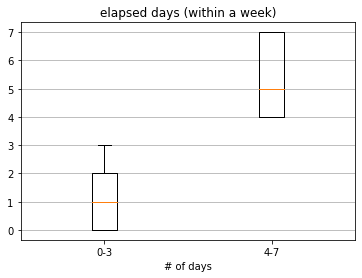

In [80]:
fig1, ax1 = plt.subplots()

# build a box plot
ax1.boxplot(list(dict_week_2020.values()), figsize=(15,7))

# title and axis labels
ax1.set_title('elapsed days (within a week)')
ax1.set_xlabel('# of days')
#ax1.set_ylabel('# of requests')
xticklabels=['0-3', '4-7']
ax1.set_xticklabels(xticklabels)


# add horizontal grid lines
ax1.yaxis.grid(True)


# show the plot
plt.show()